# Ensemble with SVM

In [79]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


data = pd.read_csv("./data/cleveland_final.csv")
X = data.drop(['num'], axis = 1)
Y = data.num.values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


### Decision Tree Classifier

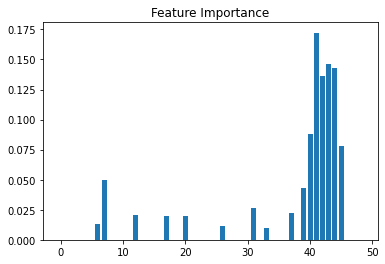

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.80      0.89      0.84         9
           2       0.71      0.62      0.67         8
           3       0.67      0.75      0.71         8
           4       1.00      0.67      0.80         3

    accuracy                           0.88        57
   macro avg       0.84      0.79      0.80        57
weighted avg       0.88      0.88      0.88        57



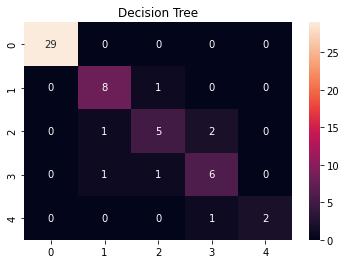

In [65]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

importance = clf.feature_importances_
pyplot.title("Feature Importance")
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

cm = confusion_matrix(y_test, y_pred)
pyplot.title("Decision Tree")
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))



### Random Forest Classifier

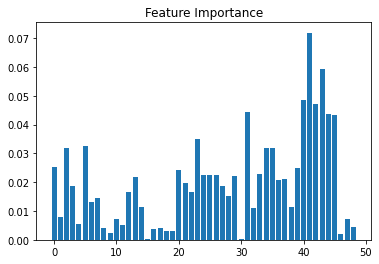

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       0.50      0.78      0.61         9
           2       1.00      0.25      0.40         8
           3       0.88      0.88      0.88         8
           4       1.00      0.67      0.80         3

    accuracy                           0.82        57
   macro avg       0.86      0.71      0.73        57
weighted avg       0.87      0.82      0.81        57



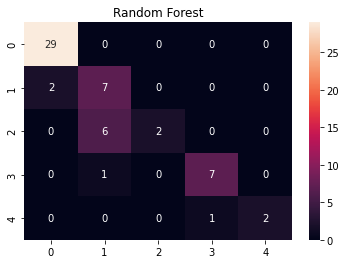

In [66]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

importance = clf.feature_importances_
pyplot.title("Feature Importance")
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

cm = confusion_matrix(y_test, y_pred)
pyplot.title("Random Forest")
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))



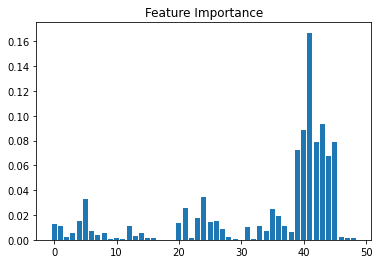

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.47      0.78      0.58         9
           2       0.00      0.00      0.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         3

    accuracy                           0.82        57
   macro avg       0.69      0.76      0.71        57
weighted avg       0.76      0.82      0.79        57



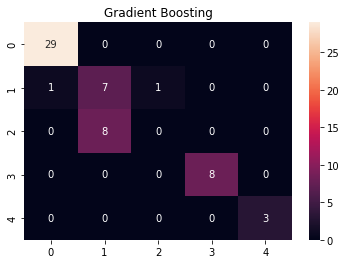

In [67]:
# Step 6: Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

importance = clf.feature_importances_
pyplot.title("Feature Importance")
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

cm = confusion_matrix(y_test, y_pred)
pyplot.title("Gradient Boosting")
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

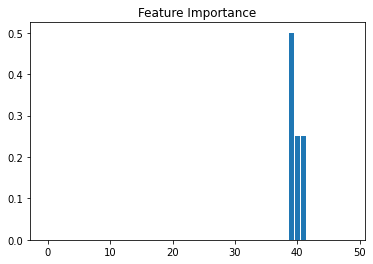

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        29
           1       0.29      0.56      0.38         9
           2       0.00      0.00      0.00         8
           3       0.50      0.12      0.20         8
           4       1.00      1.00      1.00         3

    accuracy                           0.67        57
   macro avg       0.52      0.54      0.50        57
weighted avg       0.59      0.67      0.60        57



/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

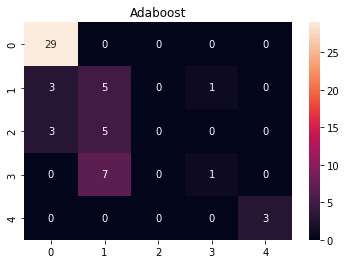

In [68]:
clf = AdaBoostClassifier(n_estimators=300)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

importance = clf.feature_importances_
pyplot.title("Feature Importance")
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

cm = confusion_matrix(y_test, y_pred)
pyplot.title("Adaboost")
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

## Ensemble: selection of models

## Ensemble with Random Forest with Voting algorithm

In [80]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

data = pd.read_csv("./data/cleveland_final.csv")
X = data.drop(['num'], axis = 1)
Y = data.num.values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# create the sub models
estimatorsh = []
estimatorss = []
model1 = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
model2 = SVC(kernel= 'linear', C=0.01)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorsh.append(('svm', model2))
estimatorsh.append(('rf', model1))
estimatorsh.append(('abc', model3))


model1 = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
model2 = SVC(kernel= 'linear', C=0.01, probability=True)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorss.append(('svm', model2))
estimatorss.append(('rf', model1))
estimatorss.append(('abc', model3))


# create the ensemble model
hensemble = VotingClassifier(estimatorsh, voting ='hard')
sensemble = VotingClassifier(estimatorss, voting ='soft')

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        29
           1       0.31      0.44      0.36         9
           2       1.00      0.12      0.22         8
           3       1.00      0.38      0.55         8
           4       1.00      0.67      0.80         3

    accuracy                           0.68        57
   macro avg       0.81      0.52      0.56        57
weighted avg       0.77      0.68      0.65        57



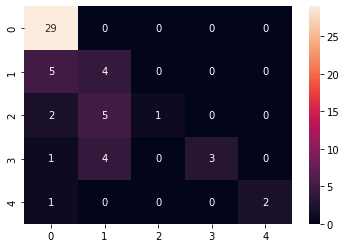

In [81]:
hensemble.fit(X_train, y_train)
y_pred = hensemble.predict(X_test)
accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        29
           1       0.27      0.33      0.30         9
           2       1.00      0.12      0.22         8
           3       0.75      0.75      0.75         8
           4       1.00      1.00      1.00         3

    accuracy                           0.74        57
   macro avg       0.78      0.64      0.64        57
weighted avg       0.78      0.74      0.70        57



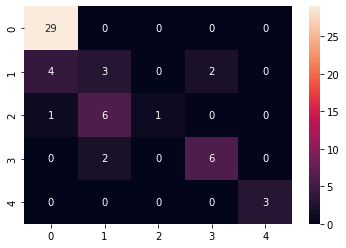

In [82]:
sensemble.fit(X_train, y_train)
y_pred = sensemble.predict(X_test)
accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

### Ensemble with Decision Tree with Voting algorithm

In [83]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

data = pd.read_csv("./data/cleveland_final.csv")
X = data.drop(['num'], axis = 1)
Y = data.num.values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# create the sub models
estimatorsh = []
estimatorss = []
model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=0.01)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorsh.append(('svm', model2))
estimatorsh.append(('dt', model1))
estimatorsh.append(('abc', model3))


model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=0.01, probability=True)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorss.append(('svm', model2))
estimatorss.append(('dt', model1))
estimatorss.append(('abc', model3))


# create the ensemble model
hensemble = VotingClassifier(estimatorsh, voting ='hard')
sensemble = VotingClassifier(estimatorss, voting ='soft')

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        29
           1       0.33      0.56      0.42         9
           2       1.00      0.12      0.22         8
           3       0.50      0.12      0.20         8
           4       1.00      0.67      0.80         3

    accuracy                           0.67        57
   macro avg       0.72      0.49      0.50        57
weighted avg       0.71      0.67      0.61        57



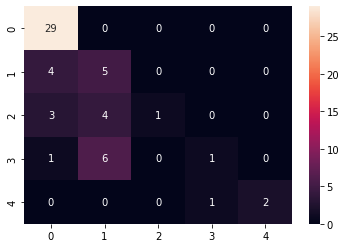

In [84]:
hensemble.fit(X_train, y_train)
y_pred = hensemble.predict(X_test)
accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

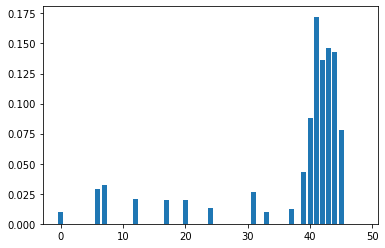

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.80      0.89      0.84         9
           2       0.78      0.88      0.82         8
           3       0.86      0.75      0.80         8
           4       1.00      0.67      0.80         3

    accuracy                           0.91        57
   macro avg       0.89      0.84      0.85        57
weighted avg       0.92      0.91      0.91        57



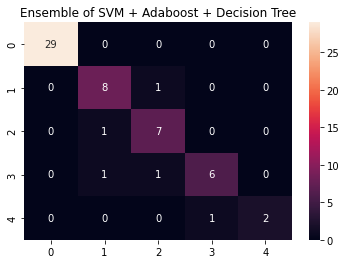

In [87]:
sensemble.fit(X_train, y_train)
y_pred = sensemble.predict(X_test)
accuracy_score(y_test, y_pred)

for model in sensemble.estimators_:
    if model.__class__.__name__ == 'DecisionTreeClassifier':
        importance = model.feature_importances_
        pyplot.bar([x for x in range(len(importance))], importance)
        pyplot.show()

cm = confusion_matrix(y_test, y_pred)
pyplot.title("Ensemble of SVM + Adaboost + Decision Tree")
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

### This is the Highest accuracy achieved so far

This is in agreement with the base Paper (soft vs hard). Going with probablistic approach to find the results meanwhile accomodating uncertainities in the result.

Many researches have ignored the attributes after 20. But our analysis proves they have ignored most of the significant features.

 Important Feature indexes in Decision Tree 
' 0 ' - 0.00956205775482884
' 6 ' - 0.028560080195192083
' 7 ' - 0.032271944922547334
' 12 ' - 0.020536692223439214
' 17 ' - 0.01961308437212052
' 20 ' - 0.019458453193392955
' 24 ' - 0.01323977227591685
' 31 ' - 0.02680273764611114
' 33 ' - 0.00956205775482884
' 37 ' - 0.012550200803212853
' 39 ' - 0.043254937833251135
' 40 ' - 0.08839799480464322
' 41 ' - 0.17227026784039356
' 42 ' - 0.13616303432761198
' 43 ' - 0.146597642417923
' 44 ' - 0.1432137829664364
' 45 ' - 0.07794525866815022


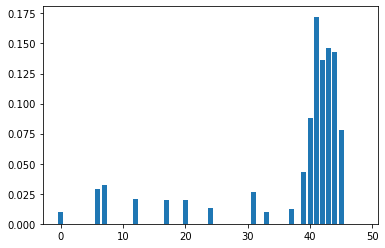

 Important Feature indexes in Adaboost 
' 39 ' - 0.5
' 40 ' - 0.25
' 41 ' - 0.25


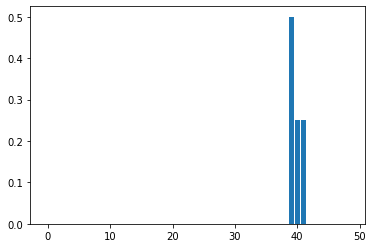

In [109]:
import pickle
# # now you can save it to a file
# with open('models/soft_ensemble.pkl', 'wb') as f:
#     pickle.dump(sensemble, f)

clf

with open('models/soft_ensemble.pkl', 'rb') as f:
    clf = pickle.load(f)

for model in clf.estimators_:
    if model.__class__.__name__ == 'DecisionTreeClassifier':
        importance = model.feature_importances_
        print("\033[1m Important Feature indexes in Decision Tree \033[0m")
        for i in range(len(importance)):
            if importance[i] != 0: 
                print ("'",i,"'", end = " - ")
                print (importance[i])
        pyplot.bar([x for x in range(len(importance))], importance)
        pyplot.show()
    
    if model.__class__.__name__ == 'AdaBoostClassifier':
        importance = model.feature_importances_
        print("\033[1m Important Feature indexes in Adaboost \033[0m")
        for i in range(len(importance)):
            if importance[i] != 0: 
                print ("'",i,"'", end = " - ")
                print (importance[i])
        pyplot.bar([x for x in range(len(importance))], importance)
        pyplot.show()

## Ensemble with Decision Tree with Bagging algorithm¶

In [ ]:
from sklearn.ensemble import BaggingClassifier
